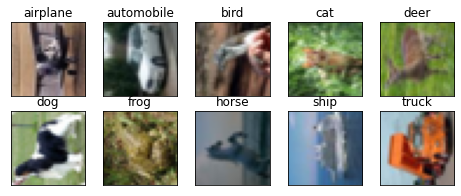

Metal device set to: Apple M1 Pro


2022-02-26 17:56:28.230325: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-02-26 17:56:28.230425: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/100


2022-02-26 17:56:29.191450: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-02-26 17:56:29.759499: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


391/391 [==============================] - ETA: 0s - loss: 1.6357 - accuracy: 0.4225

2022-02-26 17:56:52.759185: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


391/391 [==============================] - 25s 44ms/step - loss: 1.6357 - accuracy: 0.4225 - val_loss: 2.2137 - val_accuracy: 0.2434
Epoch 2/100
391/391 [==============================] - 14s 36ms/step - loss: 1.0669 - accuracy: 0.6211 - val_loss: 1.1089 - val_accuracy: 0.6349
Epoch 3/100
391/391 [==============================] - 14s 36ms/step - loss: 0.8650 - accuracy: 0.6968 - val_loss: 0.8292 - val_accuracy: 0.7101
Epoch 4/100
391/391 [==============================] - 14s 35ms/step - loss: 0.7528 - accuracy: 0.7362 - val_loss: 0.9525 - val_accuracy: 0.6828
Epoch 5/100
391/391 [==============================] - 14s 35ms/step - loss: 0.6747 - accuracy: 0.7667 - val_loss: 0.7208 - val_accuracy: 0.7511
Epoch 6/100
391/391 [==============================] - 14s 35ms/step - loss: 0.6079 - accuracy: 0.7891 - val_loss: 0.6859 - val_accuracy: 0.7628
Epoch 7/100
391/391 [==============================] - 14s 35ms/step - loss: 0.5566 - accuracy: 0.8079 - val_loss: 0.6876 - val_accuracy: 0.76

2022-02-26 18:54:46.902419: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Accuracy on test data is: 83.80


In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed Feb 16 08:19:17 2022

@author: navya
"""

import time
import sys
import matplotlib.pyplot as pyplot
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from keras.utils import np_utils
from keras.layers.core import Dense
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout
import numpy as np

from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = pyplot.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[img_num,::], (1, 0, 2))
    ax.set_title(class_names[i])
    pyplot.imshow(im)
pyplot.show()

train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255

train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

def plot_model_history(history):
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    #filename = sys.argv[0].split('/')[-1]
    pyplot.savefig('Loss_plot.png')
    pyplot.close()
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    # save plot to file
    pyplot.savefig("Acuracy_plot.png")
    pyplot.close()

def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

model = Sequential()
model.add(Conv2D(48, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(48, (3, 3), activation= 'relu'))
model.add(MaxPooling2D((2,2), strides=(2,2), padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(96, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(96, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2,2), strides=(2,2), padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(192, (3, 3), activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(192, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2,2), strides=(2,2), padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
start = time.time()
model_info = model.fit(train_features, train_labels, 
                       batch_size=128, epochs=100, 
                       validation_data = (test_features, test_labels), 
                       verbose=1)
plot_model_history(model_info)
end = time.time()
# plot model history
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))